# <center><font color='green'>Face classification</font></center>




*   Image classification refers to the labelling of images into one of a number of predefined categories. Classification system
consists of database that contains predefined patterns that
compares with detected object to classify in to proper
category.
*   Image classification is an important and
challenging task in various application domains,
including biomedical imaging, biometry, videosurveillance, vehicle navigation, industrial visual
inspection, robot navigation, and remote sensing.

*  Classification process consists of following steps:

    
       A. Pre-processing- atmospheric correction, noise removal, image transformation, main component analysis etc.

       B. Detection and extraction of a objectDetection includes detection of position and other characteristics of moving object image obtained from camera. And in extraction, from the detected object estimating the trajectory of the object in the image plane.

      C. Training: Selection of the particular attribute which best describes the pattern.

      D. Classification of the object-Object classification step categorizes detected objects into predefined classes by using suitable method that compares the image patterns with the target patterns. 




### Reading files

In [1]:

# Accessing My Google Drive
from google.colab import drive
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Installing necessary dependencies

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.utils import np_utils
from keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


from keras.models import Sequential
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense, Dropout
from keras.layers import Convolution2D, MaxPooling1D 
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Flatten
#from keras import utils as np_utils
#import theano

from PIL import Image
from numpy import *
import cv2

import matplotlib 
matplotlib.use("Agg")
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import tensorflow as tf

pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('display.width', 1000)

Using TensorFlow backend.


In [0]:
# defining global variable path
# Location of my dataset on My Google Drive
Image_path = os.path.join('drive/My Drive/Data_InsofeNet_clean')
image_dir_labels = os.listdir(Image_path)


In [4]:
image_type = open('drive/My Drive/Data_InsofeNet2/wylsow/wylsow.1.jpg')
type(image_type)

_io.TextIOWrapper

## Getting the Dimensions of Image

we know that our images are in different height and width, 3 channels (the RGB components) ((196, 196, 3 )), let’s resize it and make it 224 pixels width and height.

In [5]:
img_shape1 = cv2.imread('drive/My Drive/Data_InsofeNet_clean/9540784/9540784.2.jpg')


height, width, channels = img_shape1.shape
print(height, width, channels)

196 196 3


In [6]:
img_shape2 = cv2.imread('drive/My Drive/Data_InsofeNet2/ahodki/ahodki.1.jpg')


height, width, channels = img_shape2.shape
print(height, width, channels)

200 180 3


In [7]:
print('Type of the image : ' , type(img_shape2))
print()
print('Shape of the image : {}'.format(img_shape2.shape))
print('Image Hight {}'.format(img_shape2.shape[0]))
print('Image Width {}'.format(img_shape2.shape[1]))
print('Dimension of Image {}'.format(img_shape2.ndim))

Type of the image :  <class 'numpy.ndarray'>

Shape of the image : (200, 180, 3)
Image Hight 200
Image Width 180
Dimension of Image 3


### Loading all the images from the given folder and labeling to the each image with the directory name


The imread functions returns a NumPy array, representing the image itself.

The first parameter is the original image that we want to resize and the second argument is the our calculated dimensions of the new image. The third parameter tells us the algorithm to use when resizing.

In [8]:
#Required variables to define the image sizes and number of epochs to run for each model

img_data_list=[]
classes_names_list=[]
target_column=[]


for dataset in image_dir_labels:
    classes_names_list.append(dataset) 
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(Image_path +'/'+ dataset)
    #label = labels_name[dataset]

    for img in img_list:
      
        input_img = cv2.imread(Image_path + '/'+ dataset + '/'+ img )
        input_img_resize = cv2.resize(input_img, (224,224), interpolation = cv2.INTER_AREA)# perform the actual resizing of the image

        
        #input_img_resize=np.resize(input_img, (128,128,3))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

    
        


Loading images from yfhsie folder

Loading images from wjhugh folder

Loading images from vpsavo folder

Loading images from vstros folder

Loading images from will folder

Loading images from whussa folder

Loading images from wardcy folder

Loading images from wylsow folder

Loading images from wjalbe folder

Loading images from wjsaic folder

Loading images from voudcx folder

Loading images from vanta folder

Loading images from todris folder

Loading images from thgear folder

Loading images from tthurs folder

Loading images from tjpret folder

Loading images from virvi folder

Loading images from tom folder

Loading images from tjdyke folder

Loading images from tony folder

Loading images from tchand folder

Loading images from swewin folder

Loading images from theod folder

Loading images from swsmit folder

Loading images from theoc folder

Loading images from ste folder

Loading images from swren folder

Loading images from spyount folder

Loading images from svkriz folder


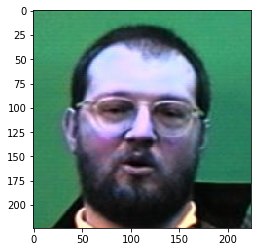

In [9]:
#A call to imshow displays the image on our screen. 
import matplotlib.pyplot as plt
plt.imshow(input_img_resize)  # graph it input_img_resize
plt.show()

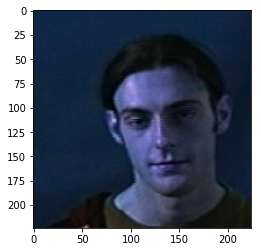

In [10]:
plt.imshow(img_data_list[24])  # graph it input_img_resize
plt.show()

In [11]:
# List of all labels (392 labels)
classes_names_list

['yfhsie',
 'wjhugh',
 'vpsavo',
 'vstros',
 'will',
 'whussa',
 'wardcy',
 'wylsow',
 'wjalbe',
 'wjsaic',
 'voudcx',
 'vanta',
 'todris',
 'thgear',
 'tthurs',
 'tjpret',
 'virvi',
 'tom',
 'tjdyke',
 'tony',
 'tchand',
 'swewin',
 'theod',
 'swsmit',
 'theoc',
 'ste',
 'swren',
 'spyount',
 'svkriz',
 'stu',
 'smrobb',
 'spletc',
 'smredh',
 'snhopp',
 'smille',
 'skumar',
 'smalga',
 'smfarrf',
 'spacl',
 'slbirc',
 'sjbeck',
 'sjpalm',
 'simm',
 'sjcutt',
 'sirmcb',
 'sherbe',
 'sidick',
 'shpill',
 'shamilc',
 'sjkill',
 'sar',
 'saedwa',
 'sapere',
 'sgjday',
 'sdwall',
 'saduah',
 'rwsick',
 'sbains',
 'sandm',
 'sdaly',
 'rlocke',
 'rmpugh',
 'rsanti',
 'rrowle',
 'rshaw',
 'rnpwil',
 'rmcoll',
 'rscoop',
 'robin',
 'rposbo',
 'rgharr',
 'rgspru',
 'rhosan',
 'rjwils',
 'rjdunc',
 'rhaitk',
 'rjobyr',
 'rjlabr',
 'rhnorm',
 'riphil',
 'rbrown',
 'pshurr',
 'rarobi',
 'pwest',
 'pspliu',
 'ptnich',
 'rafox',
 'pvaris',
 'reaton',
 'rchadh',
 'pmives',
 'pjrand',
 'pguan',
 'phu

In [12]:
# Checking the number of classes present 
num_classes = len(classes_names_list)
print(num_classes)

392


In [13]:
target_data = len(target_column)
print(target_data)

7601


## Image Pre-Processing


It is not possible to provide images of varying shapes in batches to the input of a convolutional network.

In [14]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255  #normalization
print (img_data.shape)

(7601, 224, 224, 3)


In [15]:
# Number of samples 
num_of_samples = img_data.shape[0]
num_of_samples

7601

In [16]:
# shape of Input- width, height and channel.
input_shape = img_data[0].shape
input_shape

(224, 224, 3)

## Label encoder to label the images with the numeric values


In [17]:
#label encoding
from sklearn.preprocessing import LabelEncoder

Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [18]:
import gc
gc.collect()


4543

In [0]:
#one hot encoding
target_column_hotcoded = to_categorical(target_column, num_classes)


In [0]:
# Shuffle the images 

X,Y = shuffle(img_data,target_column_hotcoded)


In [0]:
del img_data

In [0]:
del img_data_list

In [0]:
del target_column
del classes_names_list

In [0]:
#del img_files

In [24]:
gc.collect()

10

## Train and Test split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2)


In [26]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)



Number transactions X_train dataset:  (5320, 224, 224, 3)
Number transactions y_train dataset:  (5320, 392)
Number transactions X_test dataset:  (2281, 224, 224, 3)
Number transactions y_test dataset:  (2281, 392)


## Building a Convolution Layer on the basic images


In [27]:
from keras.layers import Conv2D, MaxPooling2D
#input_shape=img_data[0].shape

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
#model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)       

## Compilation

In [29]:
#Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


## Fit the model

In [30]:
hist = model.fit(X_train,y_train,batch_size=64,epochs=15,verbose=1,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 5320 samples, validate on 2281 samples
Epoch 1/15





5320/5320 [==============================] - 58s 11ms/step - loss: 5.7888 - acc: 0.0154 - val_loss: 5.1288 - val_acc: 0.0872
Epoch 2/15
5320/5320 [==============================] - 45s 9ms/step - loss: 2.6361 - acc: 0.4314 - val_loss: 0.6297 - val_acc: 0.8694
Epoch 3/15
5320/5320 [==============================] - 45s 9ms/step - loss: 0.6700 - acc: 0.8333 - val_loss: 0.3491 - val_acc: 0.9220
Epoch 4/15
5320/5320 [==============================] - 45s 9ms/step - loss: 0.3295 - acc: 0.9214 - val_loss: 0.2825 - val_acc: 0.9417
Epoch 5/15
5320/5320 [==============================] - 45s 9ms/step - loss: 0.2020 - acc: 0.9489 - val_loss: 0.2582 - val_acc: 0.9483
Epoch 6/15
5320/5320 [==============================] - 45s 9ms/step - loss: 0.1653 - acc: 0.9600 - val_loss: 0.2343 - val_acc: 0.9491
Epoch 7/15
5320/5320 [=================

## Evaluating the model

In [31]:
# Evaluating the model
score = model.evaluate(X_test,y_test,batch_size=64)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

2281/2281 [==============================] - 6s 3ms/step
Test Loss 0.2251172244552064
Test Accuracy 0.9596668129843193


## Prediction

In [0]:
Y_pred = model.predict(X_test)
#print(Y_pred[10])

In [92]:
#1)
test_image = X_test[1:2]
print (test_image.shape)


(1, 224, 224, 3)


In [93]:
print(model.predict_classes(test_image))

[22]


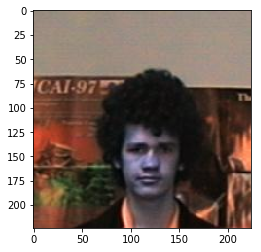

In [95]:
#2)
plt.imshow(X_test[100])

In [61]:
y_pred=np.argmax(Y_pred,axis=1)
print(y_pred[100])

279


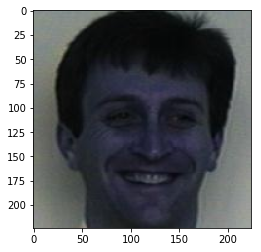

In [62]:
#3)
plt.imshow(X_test[98])

In [63]:
y_pred=np.argmax(Y_pred,axis=1)
print(y_pred[98])

112


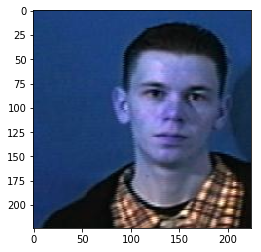

In [53]:
#4)
plt.imshow(X_test[10])

In [54]:
y_pred1=np.argmax(Y_pred,axis=1)
print(y_pred1[10])

157


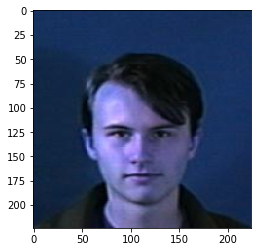

In [50]:
#5)
plt.imshow(X_test[5])

In [51]:
y_pred=np.argmax(Y_pred,axis=1)
print(y_pred[5])

115


## Plotting the Learning Curve


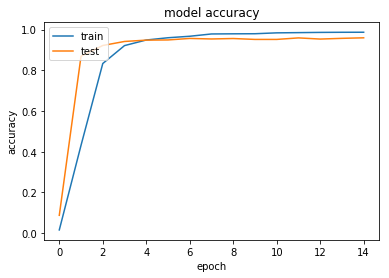

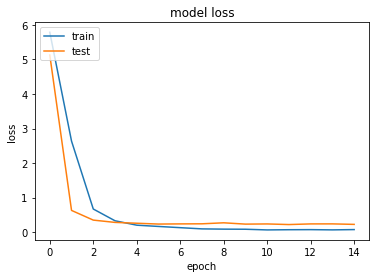

In [36]:
#Summarize hist for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

#summarize hist for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

## Testing a new image

In [0]:
from keras.preprocessing import image
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [97]:
#prediction 6)

test_image3 = image.load_img('drive/My Drive/Data_InsofeNet_clean/den/den_exp.14.jpg', target_size = (224, 224))
test_image31 = load_image_into_numpy_array(test_image3)
test_image32 = np.expand_dims(test_image31, axis = 0)
result32 = model.predict(test_image32)

print(result32)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

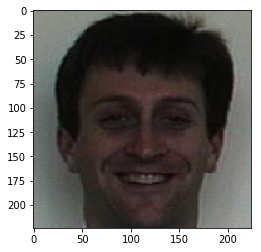

In [98]:

plt.imshow(test_image3)

In [99]:
print((model.predict(test_image32)))
print(model.predict_classes(test_image32))



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 